# WE11-Autoencoder
# Bapuji Satyala 
# U61600601

Here we are considering the Mnist data set and loading it and creating an autoencoder and then training it with the dataset and then creating a new autoencoder which will be trained along with the images that are creating by the first letter of the first name and then predicting both the mnist digits and the letter that i have considered.

## Importing the required libraries that we will be using in this note book.

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing import image


Here we are loading the MNIST data set and splitting them as train and test sets along with the labels, and we are flatting the images into a single vector and then the images are normalised such that they fall in the range near 0 and 1

### Loading the MNIST dataset


In [2]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


Here we can see that the images before  reshaping are of size 28x28 and after flattening they are of 784 

We are displaying the 10 images and displaying around 10 test images

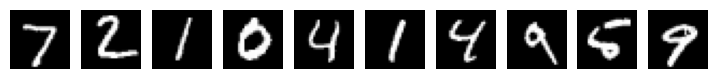

In [3]:

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Creating an Autoencoder and fitting the Model

As our images are of 28x28 pixels, we have considered the input dimension as it equals to 784 and hence there will be 784 neurons in the input layer and then we have considered fully connected dense layers with first hidden layer be with 500 neurons and the second dense layer be with 300 and the last layer with 100 neurons and these are all the encoder layers where it is responsibe for transforming the given input data to compact and informative representation of lowest dimensionality, the Relu activation function will add non linearity into the neural network which will help the model to learn complex pattersn the bottle neck layer will reducing the input into a lower dimension representation,this layer will also act as compression mechanism and there we have the decode layer which will help in reconstruction the original input data from compressed representation generated by encoder.The lower dimensional image that is produced by the bottleneck layer  that will be transformed into the higher dimensional representation that is close to the resemble the original input data.

The bottle necklayer have the neurons of 16 and has the activation function as relu, and the decoder layer's first dense layer has the 100 neurons and the activation function has the relu and the next layer has 300 neurons and then it has the 500 neurons  and the output layer has the activation function is the sigmoid which will ensure that the output values will be in range of 0,1

In [4]:

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# NOTE: The output layer of a Keras autoencoder includes a sigmoid activation function
# because it forces the output to be in the range. This is done to ensure that the 
# output can be interpreted as a probability or a pixel intensity of a grayscale image.

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       150,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       392,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,149,800 (4.39 MB)

 Trainable params: 1,149,800 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

We can see that there are 7 layers three for the encoder and three for the decoder along with the bottle neck layer, there are 1,149,800 parameters that are trained which will show the comnplexity of the model.

Here we are initializing the early stop and kept the patience as 3 such that the model looks for three ephocs if the loss is not varying then the early stop will stopo the training. and considering the epoch size as 10 and the bvatch size as 128 whh will take those many records into the memory and train the model peer epoch

In [5]:
# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.2557 - val_loss: 0.1315
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1276 - val_loss: 0.1160
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1148 - val_loss: 0.1087
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1084 - val_loss: 0.1056
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1047 - val_loss: 0.1023
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1023 - val_loss: 0.1016
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1001 - val_loss: 0.0996
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0990 - val_loss: 0.0983
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0976 - val_loss: 0.0976
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0965 - val_loss: 0.0969


### Ploting the Training loss and the validation loss of the autoencoder with varying the epoch number.

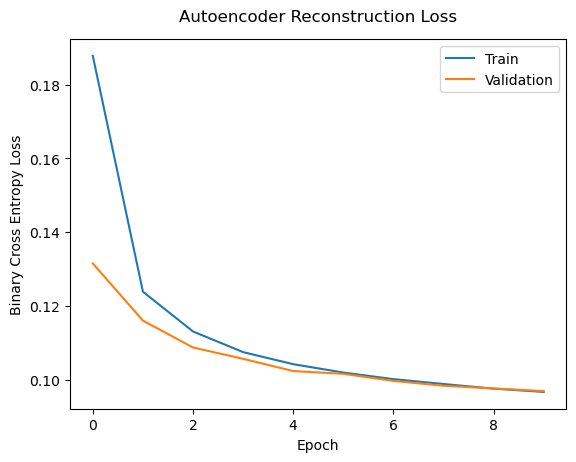

In [6]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

Here we can see that the validation loss ie the test loss quite decreased with the increase of the number of epochs and the loss is similar and in close proximity with the train data near to 7 epochs, may be further trained the loss might get increased after few epochs.

Here we are reconstructing the images by the trained autoencoder and we are plotting the images that are original along side with the reconstructed images and we can see that almost all the images are reconstructed properly. 

In [1]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

NameError: name 'autoencoder' is not defined

### Loading the Letter Images of 'B'

Here we are loading the 5 images of the first letter of the first name that are of size 28x28 which are drawn and are loaded in the imagaes are in the color mode grayscale

In [9]:
images=[]
for i in range(1,6):
    image = tf.keras.utils.load_img(f'{i}.png', target_size=(28, 28), color_mode = "grayscale")
    img = np.array(image)
    images.append(img)

Lets plot and see how the images look like 

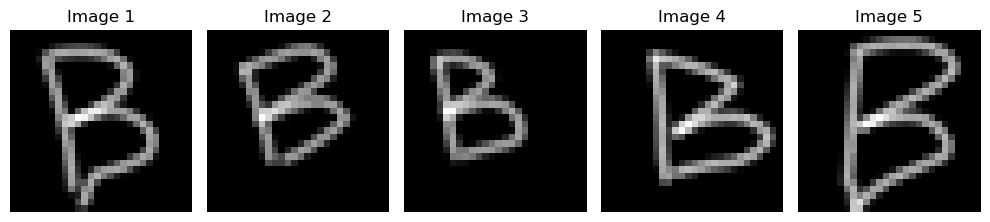

In [10]:
plt.figure(figsize=(10, 4))
for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Image {i + 1}')
    plt.axis('off')  
plt.tight_layout() 
plt.show()

Here we are converting the loaded images into an array and then we are reshaping the image and then replicating each image into 2000 as the minst data set contains many images of the digits, the model should also gets familiarized with the letter image that we added earlier, hence the shape of the images has been increased.

In [11]:
images=np.array(images)
input_arr =  images.reshape((-1, 784)).astype('float32') / 255
new_images = np.repeat(input_arr, 2000, axis=0)
new_images = np.array(new_images)
new_images.shape

(10000, 784)

Here we are combing the new over sampled images that are generated of the 5 images that we loaded of the letter B, those are concatenated with the trained images of the the MNIST images.

In [12]:
combined_train_images = np.concatenate((train_images, new_images), axis=0)


## Creating a new autoencoder 

As our images are of 28x28 pixels, we have considered the input dimension as it equals to 784 and hence there will be 784 neurons in the input layer and then we have considered fully connected dense layers with first hidden layer be with 500 neurons and the second dense layer be with 300 and the last layer with 100 neurons and these are all the encoder layers where it is responsibe for transforming the given input data to compact and informative representation of lowest dimensionality, the Relu activation function will add non linearity into the neural network which will help the model to learn complex pattersn the bottle neck layer will reducing the input into a lower dimension representation,this layer will also act as compression mechanism and there we have the decode layer which will help in reconstruction the original input data from compressed representation generated by encoder.The lower dimensional image that is produced by the bottleneck layer  that will be transformed into the higher dimensional representation that is close to the resemble the original input data.

The bottle necklayer have the neurons of 6 and has the activation function as relu, and the decoder layer's first dense layer has the 100 neurons and the activation function has the relu and the next layer has 300 neurons and then it has the 500 neurons  and the output layer has the activation function is the sigmoid which will ensure that the output values will be in range of 0,1

In [13]:
input_dim = 28*28
latent_vec_len = 6

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# NOTE: The output layer of a Keras autoencoder includes a sigmoid activation function
# because it forces the output to be in the range. This is done to ensure that the 
# output can be interpreted as a probability or a pixel intensity of a grayscale image.

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           606 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 500)            │       150,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 784)            │       392,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147,790 (4.38 MB)

 Trainable params: 1,147,790 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

We can see that there are 7 layers three for the encoder and three for the decoder along with the bottle neck layer, there are 1,147,790 parameters that are trained which will show the comnplexity of the model.

Here we are initializing the early stop and kept the patience as 3 such that the model looks for three ephocs if the loss is not varying then the early stop will stopo the training. and considering the epoch size as 10 and the bvatch size as 128 whh will take those many records into the memory and train the model per epoch.

In [14]:
# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=combined_train_images, # For autoencoders, both the input and the target are the same
    y=combined_train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(combined_train_images, combined_train_images),
    callbacks=[early_stop]
)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - loss: 0.2564 - val_loss: 0.1550
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.1524 - val_loss: 0.1462
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1451 - val_loss: 0.1426
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1418 - val_loss: 0.1400
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1393 - val_loss: 0.1374
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1374 - val_loss: 0.1355
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1357 - val_loss: 0.1343
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.1343 - val_loss: 0.1329
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1327 - val_loss: 0.1316
Epoch 10/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1315 - val_loss: 0.1304


Ploting the Training loss and the validation loss of the autoencoder with varying the epoch number.

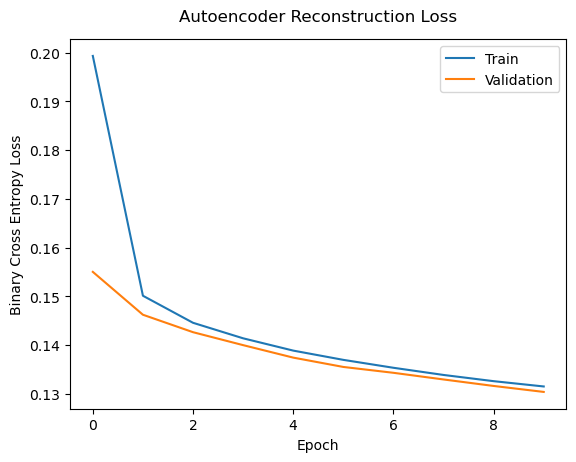

In [15]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

Here we can see that the validation loss ie the test loss quite decreased with the increase of the number of epochs and there is slight increase when during the third epoch.the loss is similar and in close proximity with the train data near to 7 epochs, may be further trained the loss might get increased after few epochs.

Here we are reconstructing the images by the trained autoencoder and we are plotting the images that are original along side with the reconstructed images and we can see that almost all the images are reconstructed properly.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


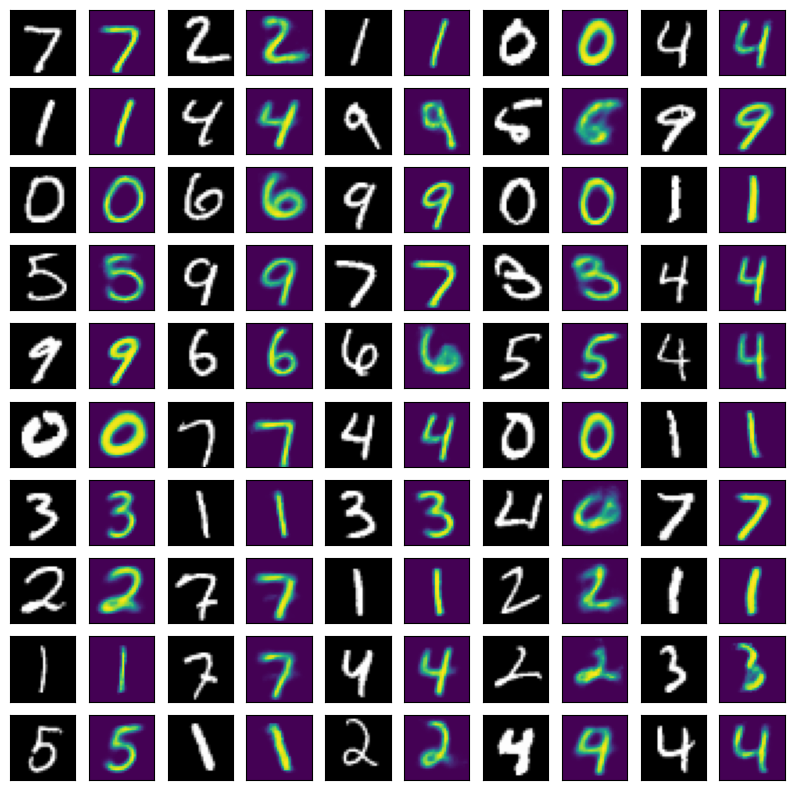

In [16]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Saving the Autoencoder 

In [17]:
autoencoder.save('trained_autoencoder.h5')

### Predicting a single image 

Here we are loading a single image from the model that we have trained the model along with the MNIST digits and we hve normalized and reshaped the gray sclae image into a batch with one image in it and then used it by predicting it the autoencoder  model that has been trained.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(1, 784)


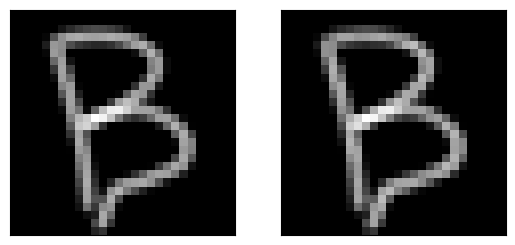

In [18]:
####################################
# load a sample image
image = tf.keras.utils.load_img('1.png', target_size=(28, 28), color_mode = "grayscale")
####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)
#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

We can see that the image has been recreated succesfully.

## Summary

Here i have considered the MNIST dataset and then loaded the data into train and test sets of images and then created an autoencoder which consists of encoder layer along with bottle neck and the decoder layer. The Encoder layer will  compress the input data into low dimensional representation of data which is called the latent space representation and  the bottleneck will be right between the encoder layer and the decoder layer this layer will reduce the dimensioanlity of the imput data forcing the autoencoder model to learn more information of the input data.Here in the autoencoder with it in the encoder layer i have passed the input data in the form of flatten form and normalized the input data such that the scaling will be within 1 and 0 so the compuatation will be quick. Then fitting the model by conisdering the train images and then validating with the test images.Then the plot for the loss value with respect to the epochs for both the train data and the test data has been plotted.Then reconstructed the MNIST digits. Then i have created five images of the first letter of my first name and then i have passed the input data in the form of flatten form and normalized the input data such that the scaling will be within 1 and 0 so the compuatation will be quick.Then compiled the model and then the fitted the model then  reconstructed the digits of the MNIST digits and then by considering a single image then predicted the image and reconstructed with by autoencoder that has been already trained by the oversampled images of the first letters and the model have reconstructed it successfully.

When the autoencoder has trained with the digits it remebered the pattern of the images, when we have created the new autoencoder and trained it along with the new images which are oversampled along with the MNIST digits, the model remembered both the MNIST digits along with the new letter which is B, so when we have tried reconstructing the image it reconstructed
